# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Aldi Prasetyo Hari
- **Email:** aldiprasetyohari24@gmail.com
- **ID Dicoding:** aldi_prasetyo_hari

## Menentukan Pertanyaan Bisnis

- Bagaimana pola bulanan nilai konsentrasi PM2.5 di Beijing dalam periode waktu March 1st, 2013 hingga February 28th, 2017 di tiap stasiun pemantauan?
- Faktor apa yang mempengaruhi tingginya nilai konsentrasi PM2.5?
- Faktor apa yang dapat menurunkan nilai konsentrasi PM2.5?
- Bagaimana tren tahunan nilai konsentrasi PM2.5 di berbagai lokasi stasiun pengukuran?
- Parameter polutan apa yang harus diperbaiki dan station mana saja yang perlu meningkatkan penanganan kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)

## Data Wrangling

### Gathering Data

In [53]:
stations=["Aotizhongxin","Changping","Dingling","Dongsi","Guanyuan","Gucheng","Huairou","Nongzhanguan","Shunyi","Tiantan","Wanliu","Wanshouxigong"]
PRSA_Data=[]
for station in stations:
    PRSA_Data.append(pd.read_csv(f"https://raw.githubusercontent.com/AldiPrasetyoHari/Air-Quality-Analysys/main/data/PRSA_Data_{station}_20130301-20170228.csv"))
PRSA_DataAll = pd.concat(PRSA_Data, ignore_index=True)    

Load Data Air Quality Dataset dari github, dimana terdapat beberapa dataset yang terpisah berdasarkan station nya, oleh karena itu akan di gabungkan menjadi satu dataset PRSA_DataAll yang mencakup seluruh station melalui iterasi.

In [54]:
PRSA_DataAll.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dapat dilihat data terkait Air Quality ini memiliki parameter yang merupakan pengukuran kualitas udara di tiap station nya yang mencakup PM2.5, PM10, SO2, NO2, CO, O3 yang merupakan parameter polusi udara serta TEMP, PRES, DEWP, RAIN, WD, WSPM yang merupakan parameter fisik.
- Data tersebut juga merupakan data yang diukur per jam setiap harinya di setiap station
- Terkait dengan informasi parameter-parameter pengukuran kualitas udara tersebut dapat dilihat sebagai berikut :
    - No: row number
    - year: year of data in this row
    - month: month of data in this row
    - day: day of data in this row
    - hour: hour of data in this row
    - PM2.5: PM2.5 concentration (ug/m^3)
    - PM10: PM10 concentration (ug/m^3)
    - SO2: SO2 concentration (ug/m^3)
    - NO2: NO2 concentration (ug/m^3)
    - CO: CO concentration (ug/m^3)
    - O3: O3 concentration (ug/m^3)
    - TEMP: temperature (degree Celsius)
    - PRES: pressure (hPa)
    - DEWP: dew point temperature (degree Celsius)
    - RAIN: precipitation (mm)
    - wd: wind direction
    - WSPM: wind speed (m/s)
    - station: name of the air-quality monitoring site

### Assessing Data

In [55]:
PRSA_DataAll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [56]:
PRSA_DataAll.isna().sum()

No            0
year          0
month         0
day           0
hour          0
           ... 
DEWP        403
RAIN        390
wd         1822
WSPM        318
station       0
Length: 18, dtype: int64

PRSA_DataAll.duplicated().sum()

In [57]:
PRSA_DataAll.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Berdasarkan informasi tersebut diketahui type data dari setiap field yang sudah sesuai.
- Terdapat missingvalue pada beberapa field yang harus diatasi. Field tersebut yakni :
    - PM2.5       8739
    - PM10        6449
    - SO2         9021
    - NO2        12116
    - CO         20701
    - O3         13277
    - TEMP         398
    - PRES         393
    - DEWP         403
    - RAIN         390
    - wd          1822
    - WSPM         318
    

### Cleaning Data

In [58]:
PRSA_DataAll[(PRSA_DataAll.isnull().any(axis=1))]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
420758,35055,2017,2,28,14,3.0,6.0,NaN,5.0000,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.0000,5.0000,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


Oleh karena terdapat banyak data missing value pada beberapa parameter pengukuran kualitas udara maka kita perlu mengatasinya yakni dengan melakukan imputasi agar kita tidak banyak kehilangan informasi. Selain itu perlu diperhatikan karena tidak ingin terlalu detail menganalisis hingga timeframe hour maka terlebih dahulu dilakukan pengkategorian Pagi, Siang, Sore (dengan asumsi perbedaan pengukurannya tidak terlalu signifikan karena diperlukannya waktu untuk penurunan konsentrasi partikel polutan maupun peningkatan konsentrasi partikel polutan dan tidak adanya faktor cuaca sebagai pengaruh eksternal) sehingga akan diperoleh data rerata di setiap kategori tersebut di setiap harinya yang nantinya dapat digunakan sebagai bahan analisa.

#### Melakukan pengkategorian terhadap periode waktu ke dalam kategori Pagi, Siang, dan Sore

Pengkategorian Pagi, Siang, Sore dilakukan dengan asumsi perbedaan pengukuran yang tidak terlalu signifikan (dalam 1 periode waktu tertentu) karena diperlukannya waktu untuk penurunan konsentrasi partikel polutan maupun peningkatan konsentrasi partikel polutan dan tidak adanya faktor cuaca sebagai pengaruh eksternal.

In [59]:
PRSA_DataAll["kategoriwaktu"] = np.where(
    (PRSA_DataAll["hour"] >= 0) & (PRSA_DataAll["hour"] <= 8), 
    "Pagi",
    np.where((PRSA_DataAll["hour"] > 8) & (PRSA_DataAll["hour"] <= 16), "Siang", "Malam")
)
PRSA_DataAll

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,kategoriwaktu
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Pagi
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Pagi
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Pagi
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Pagi
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Pagi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,Malam
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,Malam
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,Malam
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,Malam


Kini data sudah memiliki label kategori waktu pagi, siang, sore untuk selanjutnya dicari rerata dari tiap kategori waktu tersebut di setiap harinya.

In [60]:
PRSA_DataAvg = (
    PRSA_DataAll.groupby(['year', 'month', 'day', 'kategoriwaktu','station'], as_index=False)
    [['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
    .mean()
)
PRSA_DataAvg

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,Malam,Aotizhongxin,13.000000,19.285714,15.285714,34.857143,542.857143,53.857143,1.814286,1028.885714,-17.757143,0.0,1.971429
1,2013,3,1,Malam,Changping,6.285714,17.571429,31.571429,18.571429,414.285714,76.428571,1.657143,1025.642857,-18.542857,0.0,1.828571
2,2013,3,1,Malam,Dingling,7.285714,6.428571,3.000000,2.000000,214.285714,81.571429,1.657143,1025.642857,-18.542857,0.0,1.828571
3,2013,3,1,Malam,Dongsi,11.428571,18.142857,12.000000,42.571429,542.857143,59.428571,1.800000,1031.014286,-19.785714,0.0,1.600000
4,2013,3,1,Malam,Guanyuan,11.142857,17.714286,11.000000,44.000000,514.285714,49.285714,1.814286,1028.885714,-17.757143,0.0,1.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52591,2017,2,28,Siang,Nongzhanguan,5.666667,8.875000,3.875000,17.500000,312.500000,78.125000,13.475000,1014.762500,-14.150000,0.0,2.887500
52592,2017,2,28,Siang,Shunyi,11.500000,17.625000,4.125000,17.500000,350.000000,81.875000,13.162500,1015.312500,-12.137500,0.0,3.425000
52593,2017,2,28,Siang,Tiantan,9.875000,22.875000,3.500000,26.375000,400.000000,80.750000,13.475000,1014.762500,-14.150000,0.0,2.887500
52594,2017,2,28,Siang,Wanliu,4.750000,13.500000,3.875000,12.750000,275.000000,87.500000,14.325000,1013.150000,-13.662500,0.0,2.637500


Sudah mendapatkan rerata tiap parameter untuk tiap kategoriwaktu di setiap harinya, Namun perlu dilakukan pengecekan lagi apakah ada data yang masih null dari hasil rerata tersebut. Mempertimbangkan adanya kemungkinan data yang sama sekali tidak tersedia pada rentang waktu tertentu sehingga saat dilakukan perhitungan rerata akan menghasilkan null sehingga perlu di cek kembali.

In [61]:
PRSA_DataAvg[(PRSA_DataAvg.isnull().any(axis=1))]

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
17,2013,3,1,Pagi,Gucheng,5.000000,13.222222,4.375000,NaN,750.000000,80.875000,-0.933333,1023.266667,-20.344444,0.0,2.877778
29,2013,3,1,Siang,Gucheng,8.750000,13.875000,7.625000,NaN,837.500000,86.125000,4.175000,1024.800000,-20.162500,0.0,2.687500
149,2013,3,5,Malam,Gucheng,199.142857,243.142857,97.714286,NaN,100.000000,44.428571,7.028571,1006.457143,-5.957143,0.0,0.414286
162,2013,3,5,Pagi,Huairou,NaN,56.777778,15.125000,32.625000,775.000000,91.000000,0.477778,1011.144444,-9.811111,0.0,1.411111
174,2013,3,5,Siang,Huairou,NaN,123.000000,81.875000,71.625000,1400.000000,84.500000,11.625000,1006.412500,-8.637500,0.0,1.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50819,2017,1,10,Pagi,Wanshouxigong,28.333333,39.000000,6.333333,29.888889,NaN,44.111111,-0.407813,1023.781250,-15.037500,0.0,3.622222
50831,2017,1,10,Siang,Wanshouxigong,8.750000,20.250000,3.125000,16.750000,NaN,59.250000,2.168333,1026.062500,-18.675000,0.0,4.037500
51096,2017,1,18,Pagi,Aotizhongxin,43.111111,47.333333,13.222222,56.000000,NaN,32.000000,-4.773611,1030.305556,-11.977778,0.0,1.555556
52385,2017,2,23,Malam,Gucheng,35.142857,72.857143,7.500000,NaN,733.333333,41.142857,3.642857,1018.542857,-13.757143,0.0,1.485714


Ternyata dari hasil rerata tersebut masih ditemukan nilai yang null atau NaN, ini dapat terjadi disebabkan tidak ada nya data pengukuran yang berturut-turut terjadi dalam 1 kategoriwaktu yang sama bahkan lebih, Oleh karena itu perlu dilakukan pengisian data tersebut dimana diasumsikan bahwa pengukuran parameter akan memiliki hasil yang sama dengan kategoriwaktu sebelumnya atau kategoriwaktu terakhir yang berurutan secara tanggalnya sehingga tidak akan lagi ditemukan missing value dari hasil rerata ini.

In [62]:
PRSA_DataAvg[((PRSA_DataAvg["month"]==1)&(PRSA_DataAvg["day"]>=9)&(PRSA_DataAvg["day"]<=11)&(PRSA_DataAvg["year"]==2017)&(PRSA_DataAvg["station"]=='Wanshouxigong'))]

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
50771,2017,1,9,Malam,Wanshouxigong,104.428571,133.428571,10.833333,67.000000,1000.000000,22.333333,0.367857,1020.035714,-9.142857,0.0,3.442857
50783,2017,1,9,Pagi,Wanshouxigong,10.777778,13.444444,4.777778,24.666667,300.000000,45.000000,0.325000,1023.405556,-13.488889,0.0,3.388889
50795,2017,1,9,Siang,Wanshouxigong,19.500000,29.125000,6.000000,29.125000,433.333333,44.142857,1.887500,1023.033333,-14.112500,0.0,3.125000
50807,2017,1,10,Malam,Wanshouxigong,79.285714,112.285714,24.142857,85.285714,NaN,7.857143,-0.112500,1025.833333,-12.750000,0.0,1.714286
50819,2017,1,10,Pagi,Wanshouxigong,28.333333,39.000000,6.333333,29.888889,NaN,44.111111,-0.407813,1023.781250,-15.037500,0.0,3.622222
50831,2017,1,10,Siang,Wanshouxigong,8.750000,20.250000,3.125000,16.750000,NaN,59.250000,2.168333,1026.062500,-18.675000,0.0,4.037500
50843,2017,1,11,Malam,Wanshouxigong,99.714286,126.857143,27.000000,102.285714,1742.857143,9.142857,1.542857,1019.357143,-11.357143,0.0,1.228571
50855,2017,1,11,Pagi,Wanshouxigong,92.888889,114.222222,34.777778,84.555556,1500.000000,10.000000,-4.673148,1024.166667,-11.633333,0.0,1.022222
50867,2017,1,11,Siang,Wanshouxigong,80.875000,121.125000,23.375000,108.875000,2400.000000,9.875000,2.451875,1020.931250,-10.937500,0.0,1.325000


Sebagai contoh masih ada nilai yang NaN, seharusnya diisi oleh nilai yang ada sebelumnya

In [63]:
urutan_kategori = ['Pagi','Siang','Malam']
PRSA_DataAvg['kategoriwaktu'] = pd.Categorical(PRSA_DataAvg['kategoriwaktu'], categories=urutan_kategori, ordered=True)

PRSA_DataAvg = PRSA_DataAvg.sort_values(by=['station','year', 'month', 'day' ,'kategoriwaktu'])
PRSA_DataAvg = PRSA_DataAvg.reset_index(drop=True)
parameter_ukur = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

PRSA_DataAvg[parameter_ukur] = PRSA_DataAvg.groupby(['station'])[parameter_ukur].apply(lambda group: group.ffill()).reset_index(drop=True)
PRSA_DataAvg

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,Pagi,Aotizhongxin,4.666667,5.333333,11.888889,20.111111,377.777778,63.888889,-1.400000,1025.244444,-19.011111,0.0,3.766667
1,2013,3,1,Siang,Aotizhongxin,4.750000,9.375000,8.375000,14.625000,387.500000,72.625000,4.162500,1026.950000,-19.312500,0.0,3.800000
2,2013,3,1,Malam,Aotizhongxin,13.000000,19.285714,15.285714,34.857143,542.857143,53.857143,1.814286,1028.885714,-17.757143,0.0,1.971429
3,2013,3,2,Pagi,Aotizhongxin,8.222222,12.111111,22.000000,46.333333,455.555556,40.555556,-1.355556,1030.411111,-17.433333,0.0,1.355556
4,2013,3,2,Siang,Aotizhongxin,23.750000,30.750000,29.875000,62.125000,762.500000,34.500000,2.712500,1026.537500,-16.287500,0.0,1.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52591,2017,2,27,Siang,Wanshouxigong,87.400000,99.200000,22.800000,76.000000,1540.000000,38.400000,11.562500,1016.675000,-6.400000,0.0,1.912500
52592,2017,2,27,Malam,Wanshouxigong,51.000000,76.714286,9.285714,84.714286,1114.285714,27.857143,12.742857,1014.514286,-8.700000,0.0,1.671429
52593,2017,2,28,Pagi,Wanshouxigong,14.000000,22.333333,7.666667,45.888889,722.222222,35.444444,8.177778,1015.988889,-9.977778,0.0,1.655556
52594,2017,2,28,Siang,Wanshouxigong,6.500000,16.125000,3.142857,15.714286,385.714286,70.142857,13.475000,1014.762500,-14.150000,0.0,2.887500


Dengan menggunakan urutan Pagi, Siang, Malam jika di tanggal berikutnya ada nilai yang NaN d(di pagi misalnya) maka akan menggunakan data dari hari sebelumnya di malam hari. Oleh karena itu datanya diurutkan terlebih dahulu sehingga nilai NaN di baris berikutnya jika ada yang NaN maka akan gunakan dari data sebelumnya. Perlu diperhatikan kita gunakan data untuk tiap-tiap station.

In [64]:
PRSA_DataAvg[((PRSA_DataAvg["month"]==1)&(PRSA_DataAvg["day"]>=9)&(PRSA_DataAvg["day"]<=11)&(PRSA_DataAvg["year"]==2017)&(PRSA_DataAvg["station"]=='Wanshouxigong'))]


,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
52443,2017,1,9,Pagi,Wanshouxigong,10.777778,13.444444,4.777778,24.666667,300.000000,45.000000,0.325000,1023.405556,-13.488889,0.0,3.388889
52444,2017,1,9,Siang,Wanshouxigong,19.500000,29.125000,6.000000,29.125000,433.333333,44.142857,1.887500,1023.033333,-14.112500,0.0,3.125000
52445,2017,1,9,Malam,Wanshouxigong,104.428571,133.428571,10.833333,67.000000,1000.000000,22.333333,0.367857,1020.035714,-9.142857,0.0,3.442857
52446,2017,1,10,Pagi,Wanshouxigong,28.333333,39.000000,6.333333,29.888889,1000.000000,44.111111,-0.407813,1023.781250,-15.037500,0.0,3.622222
52447,2017,1,10,Siang,Wanshouxigong,8.750000,20.250000,3.125000,16.750000,1000.000000,59.250000,2.168333,1026.062500,-18.675000,0.0,4.037500
52448,2017,1,10,Malam,Wanshouxigong,79.285714,112.285714,24.142857,85.285714,1000.000000,7.857143,-0.112500,1025.833333,-12.750000,0.0,1.714286
52449,2017,1,11,Pagi,Wanshouxigong,92.888889,114.222222,34.777778,84.555556,1500.000000,10.000000,-4.673148,1024.166667,-11.633333,0.0,1.022222
52450,2017,1,11,Siang,Wanshouxigong,80.875000,121.125000,23.375000,108.875000,2400.000000,9.875000,2.451875,1020.931250,-10.937500,0.0,1.325000
52451,2017,1,11,Malam,Wanshouxigong,99.714286,126.857143,27.000000,102.285714,1742.857143,9.142857,1.542857,1019.357143,-11.357143,0.0,1.228571


Hasil pengisian nilai yang null tersebut dapat dilihat telah berhasil dimana sebagai sample digunakan data pada bulan 1 hari 9 hingga 11 tahun 2017 untuk mengamati apakah metode fill missing value telah berhasil. Dapat dilihat pada hari 10 dengan kategori waktu pagi, siang, sore kini data pada kolom CO telah terisi nilai dari data terakhir yang terisi yakni data yang berasal dari hari 9 dengan kategori waktu malam. Asumsi penggunaan nilai terakhir yakni mengingat proses berkurangnya konsentrasi partikel polutan yang berada di udara memerlukan waktu dan meningkatnya konsentrasi polutan juga disebabkan oleh akumulasi proses dengan demikian kita mengabaikan faktor eksternal seperti hujan, angin, dan faktor cuaca lainnya sebagi bahan pertimbangan dalam mengisi missing value.

In [65]:
PRSA_DataAvg[(PRSA_DataAvg.isnull().any(axis=1))]

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
21915,2013,3,1,Pagi,Gucheng,5.00,13.222222,4.375,NaN,750.0,80.875,-0.933333,1023.266667,-20.344444,0.0,2.877778
21916,2013,3,1,Siang,Gucheng,8.75,13.875000,7.625,NaN,837.5,86.125,4.175000,1024.800000,-20.162500,0.0,2.687500


Dilakukan pengecekan kembali dan masih terdapat missing value, namun demikian hal ini sangat minor dan terjadi akibat limitasi rentang waktu awal dataset dimana initial waktu pengukuran pada dataset ini adalah 2013-3-1. Kita dapat mengisi nilai tersebut dengan menggunakan nilai dari kategori waktu malam untuk hari dan station yang sama.

In [66]:
PRSA_DataAvg.loc[PRSA_DataAvg['NO2'].isna(), 'NO2']=PRSA_DataAvg[(PRSA_DataAvg['station']=='Gucheng')&(PRSA_DataAvg['day']==1)&(PRSA_DataAvg['month']==3)&(PRSA_DataAvg['year']==2013)&(PRSA_DataAvg['kategoriwaktu']=='Malam')]['NO2'].iloc[0]
PRSA_DataAvg[(PRSA_DataAvg.isnull().any(axis=1))]

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM


In [67]:
PRSA_DataAvg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52596 entries, 0 to 52595
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           52596 non-null  int64   
 1   month          52596 non-null  int64   
 2   day            52596 non-null  int64   
 3   kategoriwaktu  52596 non-null  category
 4   station        52596 non-null  object  
 5   PM2.5          52596 non-null  float64 
 6   PM10           52596 non-null  float64 
 7   SO2            52596 non-null  float64 
 8   NO2            52596 non-null  float64 
 9   CO             52596 non-null  float64 
 10  O3             52596 non-null  float64 
 11  TEMP           52596 non-null  float64 
 12  PRES           52596 non-null  float64 
 13  DEWP           52596 non-null  float64 
 14  RAIN           52596 non-null  float64 
 15  WSPM           52596 non-null  float64 
dtypes: category(1), float64(11), int64(3), object(1)
memory usage: 6.1+ MB


In [68]:
PRSA_DataAvg.describe()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000,52596.000000
mean,2014.662560,6.522930,15.729637,80.204514,105.549989,15.942887,50.687058,1233.584844,58.751952,13.683957,1010.714560,2.471875,0.065651,1.744100
std,1.177208,3.448736,8.800176,77.102934,85.033223,20.361472,32.448797,1083.468040,50.890643,11.282162,10.405373,13.722756,0.474442,1.027516
min,2013.000000,1.000000,1.000000,3.000000,3.000000,0.285600,2.000000,100.000000,0.214200,-18.444444,983.785714,-34.725000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,23.625000,41.972222,3.000000,26.428571,542.857143,17.555556,3.285714,1002.211111,-9.014286,0.000000,1.044444
50%,2015.000000,7.000000,16.000000,58.000000,86.000000,8.111111,44.111111,911.111111,47.857143,14.705556,1010.400000,2.950000,0.000000,1.485714
75%,2016.000000,10.000000,23.000000,109.678571,143.666667,20.136814,68.777778,1525.000000,84.125000,23.500000,1018.950000,15.066667,0.000000,2.155556
max,2017.000000,12.000000,31.000000,671.111111,757.333333,208.333333,252.500000,9950.000000,1071.000000,39.562500,1042.000000,28.462500,20.950000,8.428571


In [69]:
PRSA_DataAvg[(PRSA_DataAvg.isnull().any(axis=1))&((PRSA_DataAvg["month"]==4)&(PRSA_DataAvg["day"]==21))&(PRSA_DataAvg["year"]==2013)&(PRSA_DataAvg["station"]=='Wanshouxigong')]


,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM


Dapat dilihat berdasarkan pengecekan yang dilakukan untuk nilai rerata kini sudah tidak ada lagi missing value.

In [70]:
pd.set_option('display.max_rows', 30)
PRSA_DataAll[(PRSA_DataAll['station']=='Aotizhongxin')&(PRSA_DataAll['day']==1)&(PRSA_DataAll['month']==3)&(PRSA_DataAll['year']==2013)&((PRSA_DataAll['kategoriwaktu'].isin(['Pagi','Siang','Malam'])))]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,kategoriwaktu
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Pagi
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Pagi
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Pagi
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Pagi
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Pagi
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,Pagi
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,Pagi
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,Pagi
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,Pagi
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,Siang


Telah dilakukan penghitungan rerata untuk tiap kategori waktu di setap harinya, namun itu hanya untuk parameter-parameter numerik. Terdapat 1 parameter lain yang belum disertakan untuk analisis yakni field wd dimana ia merupakan data yang memiliki tipe kategorikal nominal. Arah angin atau wind direction memang menjadi salah satu penentu peningkatan maupun penurunan konsentrasi polutan dimana angin yang berhembus tersebut dapat membawa partikel-partikel polutan dari satu tempat (mengurangi konsentrasi) ke tempat lainnya (peningkatan konstentrasi) bergantung pada karakteristik wilayah yang dilalui seperti kawasan industri, tambang, pedesaan, perkotaan, dan sebagainya. Agar dapat membantu memberikan insights yang komprehensif, data wd tersebut akan ditentukan berdasarkan nilai yang paling banyak muncul atau modus di setiap kategori waktu nya dengan asumsi arah angin yang paling banyak muncul turut berkontribusi terhadap konsentrasi polutan yang terjadi pada tiap kategori waktu tersebut.

In [71]:
# Grupkan data berdasarkan 'year', 'month', 'day', 'station', 'kategoriwaktu'
PRSA_DataGrup = PRSA_DataAll.groupby(['year', 'month', 'day', 'station', 'kategoriwaktu'])

# Hitung modus untuk kolom 'wd' pada level kategoriwaktu
wd_mode_by_kategoriwaktu = PRSA_DataGrup['wd'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Gabungkan hasil modus dengan data rata-rata
PRSA_DataAvg_Mode = pd.merge(
    PRSA_DataAvg, 
    wd_mode_by_kategoriwaktu.rename(columns={'wd': 'wd_mode'}), 
    on=['year', 'month', 'day', 'station', 'kategoriwaktu'], 
    how='left'
)

# Tangani kategoriwaktu yang None
# Grupkan data berdasarkan 'year', 'month', 'day', 'station' saja
PRSA_DataGrup_without_kategoriwaktu = PRSA_DataAll.groupby(['year', 'month', 'day', 'station'])

# Hitung modus untuk kolom 'wd' tanpa kategoriwaktu
wd_mode_by_station = PRSA_DataGrup_without_kategoriwaktu['wd'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

# Gabungkan hasil ke data utama, isi nilai 'wd_mode' jika kategoriwaktu None
PRSA_DataAvg_Mode = pd.merge(
    PRSA_DataAvg_Mode, 
    wd_mode_by_station.rename(columns={'wd': 'wd_mode_fallback'}), 
    on=['year', 'month', 'day', 'station'], 
    how='left'
)

# Gunakan nilai fallback untuk kategoriwaktu yang None
PRSA_DataAvg_Mode['wd_mode'] = PRSA_DataAvg_Mode['wd_mode'].fillna(PRSA_DataAvg_Mode['wd_mode_fallback'])

# Hapus kolom tambahan jika tidak diperlukan
PRSA_DataAvg_Mode.drop(columns=['wd_mode_fallback'], inplace=True)

PRSA_DataAvg_Mode

,year,month,day,kategoriwaktu,station,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode
0,2013,3,1,Pagi,Aotizhongxin,4.666667,5.333333,11.888889,20.111111,377.777778,63.888889,-1.400000,1025.244444,-19.011111,0.0,3.766667,NNW
1,2013,3,1,Siang,Aotizhongxin,4.750000,9.375000,8.375000,14.625000,387.500000,72.625000,4.162500,1026.950000,-19.312500,0.0,3.800000,NNW
2,2013,3,1,Malam,Aotizhongxin,13.000000,19.285714,15.285714,34.857143,542.857143,53.857143,1.814286,1028.885714,-17.757143,0.0,1.971429,ENE
3,2013,3,2,Pagi,Aotizhongxin,8.222222,12.111111,22.000000,46.333333,455.555556,40.555556,-1.355556,1030.411111,-17.433333,0.0,1.355556,NNE
4,2013,3,2,Siang,Aotizhongxin,23.750000,30.750000,29.875000,62.125000,762.500000,34.500000,2.712500,1026.537500,-16.287500,0.0,1.950000,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52591,2017,2,27,Siang,Wanshouxigong,87.400000,99.200000,22.800000,76.000000,1540.000000,38.400000,11.562500,1016.675000,-6.400000,0.0,1.912500,SW
52592,2017,2,27,Malam,Wanshouxigong,51.000000,76.714286,9.285714,84.714286,1114.285714,27.857143,12.742857,1014.514286,-8.700000,0.0,1.671429,SW
52593,2017,2,28,Pagi,Wanshouxigong,14.000000,22.333333,7.666667,45.888889,722.222222,35.444444,8.177778,1015.988889,-9.977778,0.0,1.655556,ENE
52594,2017,2,28,Siang,Wanshouxigong,6.500000,16.125000,3.142857,15.714286,385.714286,70.142857,13.475000,1014.762500,-14.150000,0.0,2.887500,NNW


Wind Direction atau arah angin untuk setiap kategori waktu telah diperoleh dengan mengambil nilai yang paling sering muncul dalam 1 kategori waktu di waktu dan station yang sama. Data tersebut digabungkan dengan data rerata yang telah diperoleh sebelumnya untuk kemudian dapat menunjang analisis.

In [72]:
PRSA_DataAvg_Mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52596 entries, 0 to 52595
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           52596 non-null  int64  
 1   month          52596 non-null  int64  
 2   day            52596 non-null  int64  
 3   kategoriwaktu  52596 non-null  object 
 4   station        52596 non-null  object 
 5   PM2.5          52596 non-null  float64
 6   PM10           52596 non-null  float64
 7   SO2            52596 non-null  float64
 8   NO2            52596 non-null  float64
 9   CO             52596 non-null  float64
 10  O3             52596 non-null  float64
 11  TEMP           52596 non-null  float64
 12  PRES           52596 non-null  float64
 13  DEWP           52596 non-null  float64
 14  RAIN           52596 non-null  float64
 15  WSPM           52596 non-null  float64
 16  wd_mode        52596 non-null  object 
dtypes: float64(11), int64(3), object(3)
memory usage: 

Kita telah melakukan handling missing values dan mengelompokkan data berdasarkan kategoriwaktu pagi, siang, dan sore didasarkan pada rentang waktu perharinya.

**Insight:**
- TimeFrame yang digunakan untuk analisis lebih lanjut dengan membuat kategori baru yakni Pagi, Siang, dan Malam dimana kategori pagi dimulai dari jam >=0 hingga <=8. Untuk siang dimulai dari jam >8 hingga jam <=16 dan selebihnya Malam.
- Pengkategorian tersebut dilakukan dengan asumsi penurunan konsentrasi partikel polutan maupun peningkatan konsentrasi partikel polutan yang tidak signifikan perbedaan nya dalam 1 kategori waktu yang sama serta asumsi ideal mengabaikan faktor eksternal yang berpengaruh terhadap degradasi polutan maupun akumulasi polutan.
- Dengan dilakukannya pembuatan kategori baru yang didasarkan pada asumsi ilmiah tersebut kita dapat menangani missing value dengan menggunakan nilai rata-rata yang diperoleh di setiap kategori waktu di setiap harinya, meminimalisir kehilangan banyak informasi akibat amputasi data, dan mempermudah analisis menjadi dalam tingakatan per kategori waktu tidak dalam hour.
- Dalam analisis ini, disertakan field WD yang merupakan Wind Direction atau arah angin karena timeframe yang diubah tidak lagi menjadi hour dimana tipe datanya merupakan nominal sehingga dalam mengambil data maka dipilih yang paling sering muncul atau modus untuk dapat di masukkan ke dalam kategori waktu pagi, siang, dan malam. Tentunya dengan asumsi bahwa arah angin tersebut turut berkontribusi terhadap konsenstrasi partikel polutan.

## Exploratory Data Analysis (EDA)

### Explore ...

Menghitung nilai rerata tiap parameter perhari 

In [73]:
agg_funcs = {
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
    'wd_mode': lambda x: x.mode()[0]  # Mengambil modus untuk wd_mode
}

# Grouping berdasarkan station, kategoriwaktu, day, month, dan year
PRSA_DataAvg_ModePerDay = PRSA_DataAvg_Mode.groupby(['station', 'day', 'month', 'year']).agg(agg_funcs).reset_index().sort_values(by=['station', 'day', 'month', 'year'])


In [74]:
PRSA_DataAvg_ModePerDay

,station,day,month,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode
0,Aotizhongxin,1,1,2014,48.522487,163.558862,27.107804,69.547619,1448.809524,18.863095,2.771892,1009.228241,-10.590873,0.0,1.271230,NNW
1,Aotizhongxin,1,1,2015,41.072751,64.683201,22.592593,51.283069,993.650794,23.603175,-2.051587,1023.884921,-22.167063,0.0,2.208862,SW
2,Aotizhongxin,1,1,2016,169.208333,199.966931,45.669974,124.702381,3966.798942,10.683862,-1.815476,1019.517262,-7.220635,0.0,0.985582,E
3,Aotizhongxin,1,1,2017,465.564153,480.342593,8.849868,153.126984,6812.764550,4.814153,-2.800000,1020.946825,-4.983466,0.0,1.097950,E
4,Aotizhongxin,1,2,2014,128.402116,126.181878,54.912037,59.786376,1801.719577,1.939815,2.989683,1009.757077,0.247090,0.0,1.298876,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,Wanshouxigong,31,10,2016,8.473545,20.972222,2.995370,16.373016,261.044974,42.550926,3.260119,1033.180556,-17.800529,0.0,2.859193,N
17528,Wanshouxigong,31,12,2013,58.328042,146.785053,28.833333,56.123677,1504.166667,21.807540,4.282606,1006.160516,-14.608730,0.0,2.447817,W
17529,Wanshouxigong,31,12,2014,3.941799,45.893519,10.458333,14.764021,358.597884,55.849206,-1.185847,1030.217593,-23.445899,0.0,4.174339,WNW
17530,Wanshouxigong,31,12,2015,66.907407,87.324074,17.408069,70.851190,1767.460317,15.433862,-1.201720,1028.298743,-9.692262,0.0,1.158929,E


Kita lakukan perhitungan untuk mendapatkan nilai rata-rata per hari dari setiap parameter untuk kemudian dapat dilihat tren nya secara harian.

Menghitung nilai rerata tiap parameter perbulan

In [75]:
agg_funcs = {
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
    'wd_mode': lambda x: x.mode()[0]  # Mengambil modus untuk wd_mode
}

# Grouping berdasarkan station, kategoriwaktu, day, month, dan year
PRSA_DataAvg_ModePerMonth = PRSA_DataAvg_Mode.groupby(['station', 'month', 'year']).agg(agg_funcs).reset_index().sort_values(by=['station', 'month', 'year'])
PRSA_DataAvg_ModePerMonth

,station,month,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode
0,Aotizhongxin,1,2014,95.603559,126.204621,58.303358,67.370264,1858.173323,15.845579,-0.040664,1020.029047,-12.153970,0.000000,1.747337,NE
1,Aotizhongxin,1,2015,91.525017,115.732113,37.934097,69.581720,2040.890084,19.428465,-0.579337,1021.959012,-14.315425,0.000307,1.689883,ENE
2,Aotizhongxin,1,2016,68.034174,87.295131,23.014755,55.821279,1806.050094,32.694884,-4.430182,1025.925073,-18.068875,0.000597,2.112231,NNW
3,Aotizhongxin,1,2017,115.130056,127.511094,20.288317,71.596646,2059.760625,40.686295,-1.025064,1025.039701,-12.805640,0.000422,1.972506,NE
4,Aotizhongxin,2,2014,149.986418,156.587396,57.267536,67.943944,2128.247354,20.164040,-0.013454,1022.359382,-8.917959,0.008596,1.672914,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Wanshouxigong,11,2016,107.141689,137.470370,10.530511,71.929519,1811.988536,14.152006,4.550668,1020.536195,-3.776942,0.007119,1.569213,ENE
572,Wanshouxigong,12,2013,92.357036,122.705581,44.612127,66.885178,2194.941116,12.942467,0.059383,1019.127675,-13.254930,0.000000,1.698524,W
573,Wanshouxigong,12,2014,69.102151,113.361610,33.250239,64.874368,1871.682454,29.405692,-0.115178,1025.873906,-16.172527,0.000000,2.193546,WNW
574,Wanshouxigong,12,2015,171.736866,183.664217,24.573920,77.020097,3105.440348,17.569227,-0.274970,1024.073703,-7.226016,0.002509,1.860104,ENE


Kita lakukan perhitungan untuk mendapatkan nilai rata-rata per bulan dari setiap parameter untuk kemudian dapat dilihat tren nya secara bulanan.

Download Data PRSA_DataAvg_ModePerMonth

In [76]:
agg_funcs = {
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
    'wd_mode': lambda x: x.mode()[0]  # Mengambil modus untuk wd_mode
}

# Grouping berdasarkan station, kategoriwaktu, day, month, dan year
PRSA_DataAvg_ModePerYear = PRSA_DataAvg_Mode.groupby(['station', 'year']).agg(agg_funcs).reset_index().sort_values(by=['station', 'year'])
PRSA_DataAvg_ModePerYear

,station,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode
0,Aotizhongxin,2013,82.541680,113.493782,23.572580,63.458453,1139.673960,48.996434,15.618637,1008.166190,6.476499,0.073174,1.541798,NE
1,Aotizhongxin,2014,91.264396,124.769571,21.925939,63.991771,1208.935421,49.563005,14.016261,1011.282857,4.151816,0.058035,1.488589,NE
2,Aotizhongxin,2015,81.878090,112.606076,14.366597,60.907475,1430.123795,65.379362,13.642520,1012.532052,2.707120,0.073445,1.917958,ENE
3,Aotizhongxin,2016,74.037722,94.977397,10.852772,48.340631,1187.565559,63.517755,14.043612,1012.778767,2.282084,0.081061,1.877769,ENE
4,Aotizhongxin,2017,93.933315,106.688817,20.672969,66.242395,1655.039683,47.755919,0.819331,1023.580960,-13.212995,0.003349,1.973214,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Wanshouxigong,2013,84.148418,112.219398,21.878296,55.975588,1408.444693,54.924976,15.962345,1007.181055,5.763931,0.064608,1.590408,E
56,Wanshouxigong,2014,90.971033,128.159363,23.366155,62.249124,1445.050989,57.790863,14.415740,1010.926412,3.006620,0.050396,1.595811,SW
57,Wanshouxigong,2015,84.647076,111.948494,14.359198,52.824266,1362.527434,60.800635,13.728662,1012.374383,2.797817,0.073962,1.910550,E
58,Wanshouxigong,2016,78.148655,99.115193,10.612792,50.099848,1219.202410,59.686439,14.043612,1012.778767,2.282084,0.081061,1.877769,ENE


Kita lakukan perhitungan untuk mendapatkan nilai rata-rata per tahun dari setiap parameter untuk kemudian dapat dilihat tren nya secara tahunan.

In [77]:
PRSA_DataAvg_ModePerYear.to_csv("PRSA_DataAvg_ModePerYear.csv",index=False)

In [78]:
(PRSA_DataAvg_ModePerMonth[(PRSA_DataAvg_ModePerMonth["station"]=="Dongsi")&(PRSA_DataAvg_ModePerMonth["month"]==7)]["PM2.5"]).mean()

np.float64(81.59259899300221)

In [79]:
month_mapping = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

# Kelompokkan berdasarkan 'station' dan 'month', lalu hitung rata-rata PM2.5
monthly_avg = PRSA_DataAvg_ModePerMonth.groupby(['station', 'month'])['PM2.5'].mean()

# Menemukan station dengan rata-rata PM2.5 tertinggi per bulan dan nilai rata-rata PM2.5
max_param_per_month = monthly_avg.groupby('month').idxmax()
max_param_values = monthly_avg.groupby('month').max()

# Gabungkan hasil nama station dan rata-rata PM2.5 dalam DataFrame
result_param = pd.DataFrame({
    'Station': max_param_per_month.apply(lambda x: x[0]),  # Mengambil hanya nama station
    'Rata-rata PM2.5': max_param_values,
    'month': max_param_values.index
}).reset_index(drop=True)

# Menambahkan nama bulan ke dalam DataFrame
result_param['month'] = result_param['month'].map(month_mapping)

# Menampilkan hasil
print(result_param)


          Station  Rata-rata PM2.5      month
0   Wanshouxigong       107.821261    Januari
1   Wanshouxigong        97.279045   Februari
2          Dongsi       100.400594      Maret
3         Gucheng        78.240548      April
4          Dongsi        69.719109        Mei
5          Wanliu        74.053174       Juni
6          Dongsi        81.592599       Juli
7          Dongsi        59.256189    Agustus
8          Dongsi        66.883021  September
9    Nongzhanguan       100.141409    Oktober
10   Nongzhanguan       106.554686   November
11  Wanshouxigong       122.760942   Desember


Kita dapat melihat station yang memiliki nilai rata-rata tertinggi di bulan yang sama dari tahun 2013 hingga 2017 untuk parameter PM2.5

In [80]:
# Kelompokkan berdasarkan 'station' dan 'month', lalu hitung rata-rata PM2.5
monthly_avg = PRSA_DataAvg_ModePerMonth.groupby(['station', 'month'])['PM10'].mean()

# Menemukan station dengan rata-rata PM2.5 tertinggi per bulan dan nilai rata-rata PM2.5
max_param_per_month = monthly_avg.groupby('month').idxmax()
max_param_values = monthly_avg.groupby('month').max()

# Gabungkan hasil nama station dan rata-rata PM2.5 dalam DataFrame
result_param = pd.DataFrame({
    'Station': max_param_per_month.apply(lambda x: x[0]),  # Mengambil hanya nama station
    'Rata-rata PM10': max_param_values,
    'month': max_param_values.index
}).reset_index(drop=True)

# Menambahkan nama bulan ke dalam DataFrame
result_param['month'] = result_param['month'].map(month_mapping)

# Menampilkan hasil
print(result_param)


          Station  Rata-rata PM10      month
0   Wanshouxigong      132.029567    Januari
1   Wanshouxigong      116.196771   Februari
2         Gucheng      153.695638      Maret
3         Gucheng      138.466287      April
4         Gucheng      130.806764        Mei
5         Gucheng      104.559193       Juni
6         Gucheng      100.284818       Juli
7         Gucheng       88.198293    Agustus
8         Gucheng       97.090959  September
9         Gucheng      128.502747    Oktober
10   Nongzhanguan      131.919468   November
11  Wanshouxigong      147.523365   Desember


Kita dapat melihat station yang memiliki nilai rata-rata tertinggi di bulan yang sama dari tahun 2013 hingga 2017 untuk parameter PM10.

In [81]:
# List parameter yang ingin dihitung rata-ratanya
parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Membuat list untuk menyimpan hasil
result_list = []

# Menghitung rata-rata untuk setiap parameter berdasarkan 'station', 'month', dan 'year'
for param in parameters:
    # Kelompokkan berdasarkan 'station', 'month', dan 'year', lalu hitung rata-rata untuk parameter tersebut
    monthly_avg = PRSA_DataAvg_ModePerMonth.groupby(['station', 'month', 'year'])[param].mean()

    # Menemukan station dengan rata-rata tertinggi per bulan dan tahun untuk parameter ini
    max_param_per_month = monthly_avg.groupby(['month', 'year']).idxmax()
    max_param_values = monthly_avg.groupby(['month', 'year']).max()

    # Gabungkan hasil nama station, rata-rata parameter, dan bulan
    result = pd.DataFrame({
        'Station': max_param_per_month.apply(lambda x: x[0]),  # Nama station
        'Parameter': param,
        'Rata-rata Parameter': max_param_values,
        'month': max_param_values.index.get_level_values('month'),
        'year': max_param_values.index.get_level_values('year')
    }).reset_index(drop=True)

    # Menambahkan nama bulan
    result['Bulan'] = result['month'].map(month_mapping)

    # Menambahkan hasil ke list
    result_list.append(result)

# Menggabungkan semua hasil menjadi satu DataFrame
final_result = pd.concat(result_list, ignore_index=True)

# Menampilkan hasil akhir
print(final_result[['Station','Bulan', 'Parameter', 'Rata-rata Parameter']])


           Station     Bulan Parameter  Rata-rata Parameter
0    Wanshouxigong   Januari     PM2.5           119.173383
1     Nongzhanguan   Januari     PM2.5           108.863279
2          Gucheng   Januari     PM2.5            77.623135
3    Wanshouxigong   Januari     PM2.5           131.955453
4           Wanliu  Februari     PM2.5           162.792829
..             ...       ...       ...                  ...
523        Gucheng  November      WSPM             1.799656
524      Changping  Desember      WSPM             2.052044
525      Changping  Desember      WSPM             2.673628
526      Changping  Desember      WSPM             1.866807
527      Changping  Desember      WSPM             1.722583

[528 rows x 4 columns]


Agar dapat memudahkan dalam menampilkan nya dalam visualisasi, maka hasil dari tiap nama station yang memiliki nilai rata-rata parameter tertinggi di bulan yang sama berdasarkan data bulanan dari tahun 2013-2017 dikumpulkan menjadi 1 tabel dengan pemisah menggunakan flagging parameter.

**Insight:**
- Kita dapat mengetahui pola harian dari tiap parameter yang diukur.
- Kita dapat nilai rata-rata bulanan dari tiap parameter yang diukur.
- Kita dapat nilai rata-rata tahunan dari tiap parameter yang diukur.
- Kita dapat mengetahui station mana saja yang memiliki nilai rata-rata tertinggi di bulan tertentu berdasarkan data dari tahun 2013 hingga 2017.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

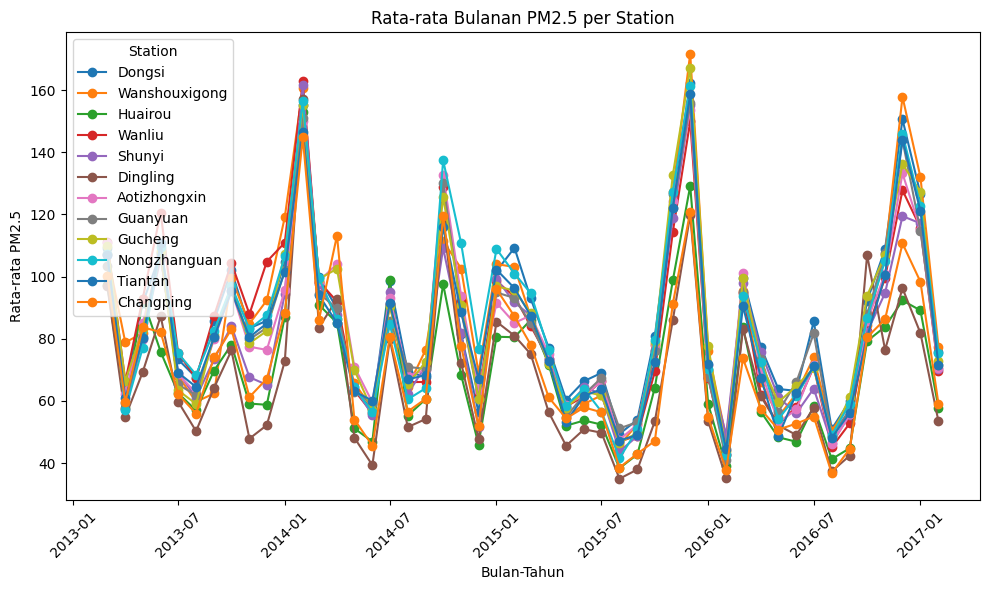

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat kolom 'month_year' untuk pengelompokan
PRSA_DataAvg_ModePerMonth['month_year'] = pd.to_datetime(PRSA_DataAvg_ModePerMonth[['year', 'month']].assign(day=1))

# Sortir DataFrame berdasarkan 'month_year' agar urut kronologis
PRSA_DataAvg_ModePerMonth = PRSA_DataAvg_ModePerMonth.sort_values(by='month_year')

# Membuat plot untuk PM2.5 per station
stations = PRSA_DataAvg_ModePerMonth['station'].unique()

plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik

for station in stations:
    station_data = PRSA_DataAvg_ModePerMonth[PRSA_DataAvg_ModePerMonth['station'] == station]
    plt.plot(station_data['month_year'], station_data['PM2.5'], label=station, marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Rata-rata Bulanan PM2.5 per Station')

# Menambahkan legend dengan ukuran font lebih kecil
plt.legend(title='Station', fontsize=10)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


Dapat dilihat pola bulanan untuk parameter PM2.5 di berbagai station pemantauan polusi. Dimana terdapat bulan-bulan tertentu rendahnya polutan PM2.5 maupun tinggi nya polutan PM2.5 dan untuk pola di semua station sama hal ini dapat menunjukkan jika adanya aktifitas yang rutin pada bulan-bulan tertentu yang mendorong terjadinya polutan maupun faktor cuaca yang mempengaruhi.

### Pertanyaan 2:

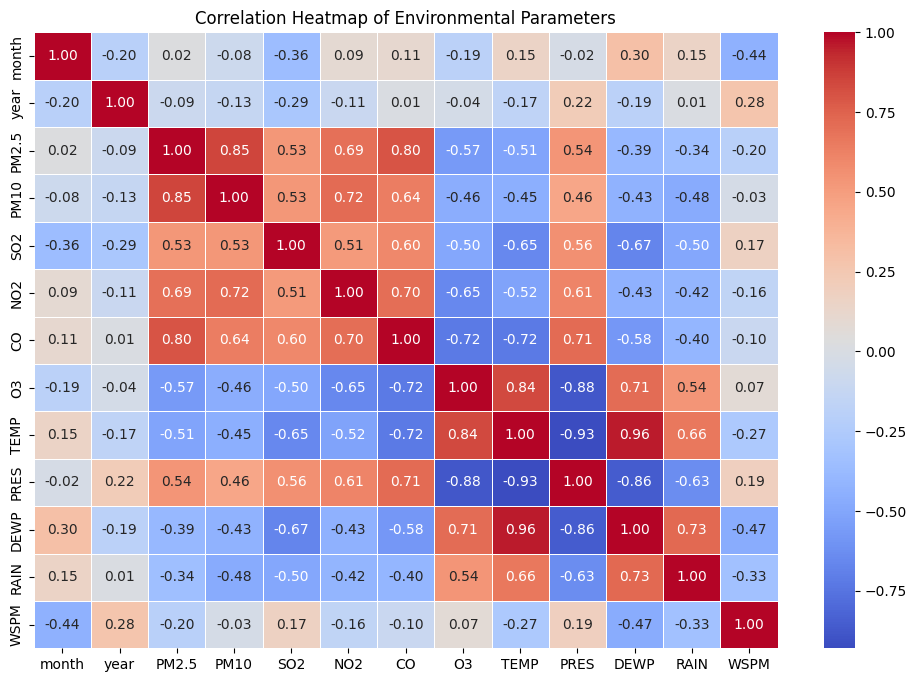

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih hanya kolom numerik
numerical_data = PRSA_DataAvg_ModePerMonth.select_dtypes(include='number')

# Menghitung matriks korelasi antar parameter numerik
corr_matrix = numerical_data.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Memberikan judul pada heatmap
plt.title('Correlation Heatmap of Environmental Parameters')

# Menampilkan heatmap
plt.show()


Berikut merupakan heatmap yang menunjukkan korelasi antara parameter dimana digunakan data rata-rata bulanan parameter untuk masing-masing bulan dari tahun 2013 hingga 2017. Nilai heatmap tersebut jika nilainya semakin mendekati 1 yang berarti positif maka dapat dikatakan korelasi antara kedua parameter tersebut sangat kuat dan saling mempengaruhi secara positif. Jika nilainya mendekati -1 yang berarti negatif maka dapat dikatakan korelasi antara kedua parameter tersebut sangat kuat dan saling mempengaruhi secara negatif atau berkebalikan. Sebagai contoh, hubungan antara CO dengan PM2.5 dimana dinyatakan bernila 0.8 yang artinya semakin banyak polutan CO maka polutan PM2.5 akan semakin banyak juga, begitupun dengan parameter lain seperti SO2, NO2 dimana keduanya memiliki korelasi positif yang berkontribusi dalam meningkatkan polutan PM2.5. Adapun faktor cuaca yang mendorong meningkatnya PM2.5 yakni Pressure atau tekanan dimana semakin tinggi tekanan maka akan berpengaruh pada penyebaran polutan PM2.5 di dekat permukaan tanah sehingga konsentrasinya akan semakin tinggi. Jika tekanan mengalamin penurunan maka polutan PM2.5 juga akan mengalami penurunan akibat terdispersi atau terdistribusi ke atas menjauhi permukaan tanah sehingga konsentrasi PM2.5 di permukaan pun akan berkurang. 

### Pertanyaan 3:

Berdasarkan heatmap tersebut dapat diketahui juga faktor yang dapat menurunkan konsentrasi polutan PM2.5 dimana faktor yang dimaksud yakni faktor eksternal seperti cuaca dimana dapat dilihat jika Tekanan, Suhu, Kelembaban dan Hujan dapat mempengaruhi konsentrasi PM2.5. Meskipun kita tahu PM2.5 ini dipengaruhi oleh polutan lain seperti SO2, NO2, CO, dan sebagainya namun faktor-faktor cuaca tersebut dapat mempengaruhi secara tidak langsung konsentrasi PM2.5 hal ini dapat dilihat dari nilai korelasi yang tidak begitu besar contohnya antara kelembaban terhadap PM2.5 yang hanya menunjukkan angka korelasi sebesar -0.39 namun jika dibandingkan dengan SO2, NO2, maupun CO angka korelasinya >=0.43. Korelasi negatif tersebut menunjukkan semakin rendah kelembaban maka semakin banyak polutan yang ada di udara demikian juga pada parameter rain dimana menunjukkan korelasi negatif pada parameter polutan dimana semakin besar intensistas hujan maka konsentrasi polutan juga akan berkurang. Pada parameter suhu (TEMP) memiliki korelasi negatif terhadap parameter polutan terutama pada CO yang memiliki korelasi negatif cukup kuat dimana semakin rendah suhu maka konsentrasi polutan CO semakin tinggi hal ini dapat terjadi akibat peningkatan penggunaan bahan bakar fosil untuk keperluan alat penghangat ruangan sehingga mendorong terjadinya peningkatan konsentrasi CO. Hal ini dapat dilihat pada grafik dibawah ini dimana terdapat pola yang berkebalikan antara suhu dengan polutan.

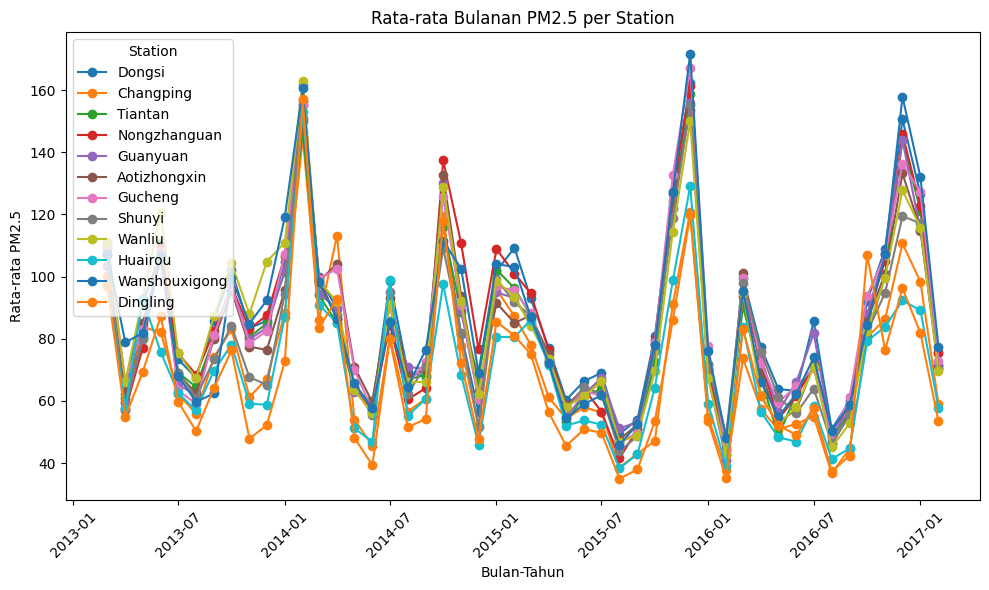

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat kolom 'month_year' untuk pengelompokan
PRSA_DataAvg_ModePerMonth['month_year'] = pd.to_datetime(PRSA_DataAvg_ModePerMonth[['year', 'month']].assign(day=1))

# Sortir DataFrame berdasarkan 'month_year' agar urut kronologis
PRSA_DataAvg_ModePerMonth = PRSA_DataAvg_ModePerMonth.sort_values(by='month_year')

# Membuat plot untuk PM2.5 per station
stations = PRSA_DataAvg_ModePerMonth['station'].unique()

plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik

for station in stations:
    station_data = PRSA_DataAvg_ModePerMonth[PRSA_DataAvg_ModePerMonth['station'] == station]
    plt.plot(station_data['month_year'], station_data['PM2.5'], label=station, marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Rata-rata Bulanan PM2.5 per Station')

# Menambahkan legend dengan ukuran font lebih kecil
plt.legend(title='Station', fontsize=10)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


Seperti yang sudah dijelaskan sebelumnya dimana terdapat pola pada bulan-bulan tertentu, kini kita bandingkan dengan pola TEMP untuk melihat juga adakah korelasi fisisnya.

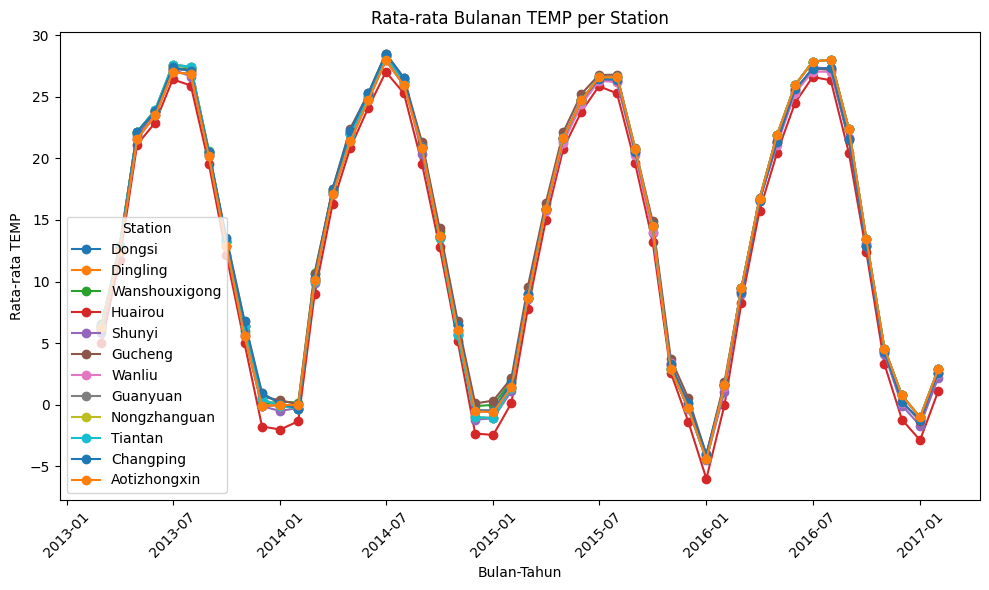

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat kolom 'month_year' untuk pengelompokan
PRSA_DataAvg_ModePerMonth['month_year'] = pd.to_datetime(PRSA_DataAvg_ModePerMonth[['year', 'month']].assign(day=1))

# Sortir DataFrame berdasarkan 'month_year' agar urut kronologis
PRSA_DataAvg_ModePerMonth = PRSA_DataAvg_ModePerMonth.sort_values(by='month_year')

# Membuat plot untuk PM2.5 per station
stations = PRSA_DataAvg_ModePerMonth['station'].unique()

plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik

for station in stations:
    station_data = PRSA_DataAvg_ModePerMonth[PRSA_DataAvg_ModePerMonth['station'] == station]
    plt.plot(station_data['month_year'], station_data['TEMP'], label=station, marker='o')

# Menambahkan label dan judul
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata TEMP')
plt.title('Rata-rata Bulanan TEMP per Station')

# Menambahkan legend dengan ukuran font lebih kecil
plt.legend(title='Station', fontsize=10)

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan grafik
plt.show()


Berdasarkan data grafik tersebut ini menunjang hasil analisa yang telah disebutkan jika peningkatan polutan dapat disebabkan oleh kondisi suhu yang terjadi dimana didukung juga oleh korelasi negatif yang cukup kuat dimana semakin rendah suhu maka konsentrasi polutan juga akan meningkat akibat dari meningkatnya penggunaan bahan bakar fosil untuk alat penghangat ruangan. Tentunya penggunaan bahan bakar fosil tersebut juga akan berpengaruh terhadap meningkatnya parameter-parameter polutan seperti SO2, NO2, dan CO sehingga akan berpengaruh juga terhadap hasil pengukuran konsentrasi polutan PM2.5.

### Pertanyaan 4:

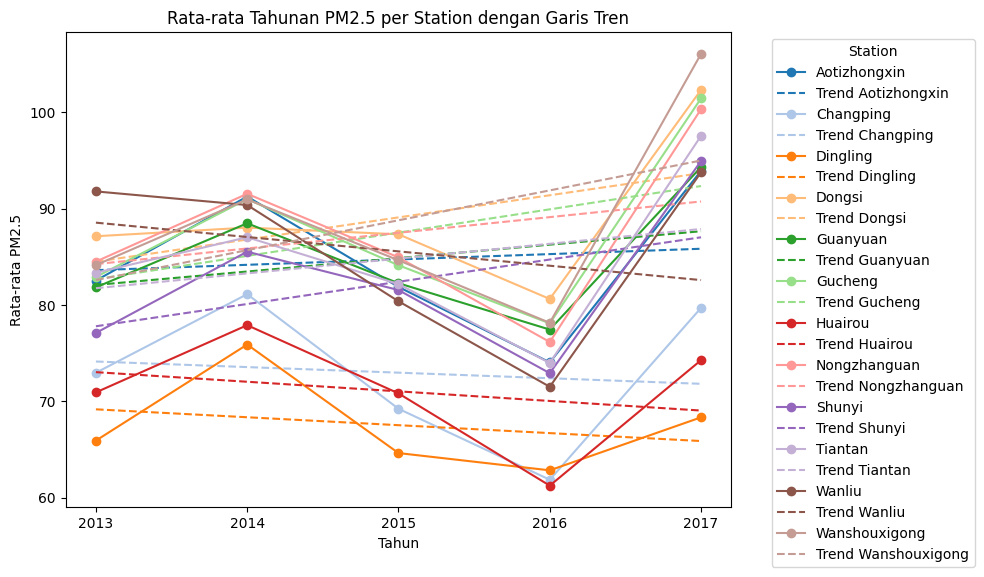

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat plot untuk setiap stasiun
stations = PRSA_DataAvg_ModePerYear['station'].unique()

plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran grafik

# Mendapatkan palet warna yang lebih besar
colors = plt.cm.tab20.colors  # Tab20 memiliki lebih banyak warna

for i, station in enumerate(stations):
    # Data per stasiun
    station_data = PRSA_DataAvg_ModePerYear[PRSA_DataAvg_ModePerYear['station'] == station]
    x = station_data['year']
    y = station_data['PM2.5']
    
    # Warna spesifik untuk stasiun ini
    color = colors[i % len(colors)]
    
    # Plot data asli
    plt.plot(x, y, label=f'{station}', marker='o', color=color)
    
    # Menambahkan garis tren
    coef = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    trendline = np.poly1d(coef)
    plt.plot(x, trendline(x), linestyle='--', color=color, label=f'Trend {station}')

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Rata-rata Tahunan PM2.5 per Station dengan Garis Tren')

# Menambahkan legend di luar plot
plt.legend(title='Station', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.xticks(PRSA_DataAvg_ModePerYear['year'].unique())
plt.tight_layout()
plt.show()


Dapat kita lihat pola rata-rata tahunan untuk polutan PM2.5 dimana pada beberapa station pengukuran terdapat kecenderungan peningkatan polutan PM2.5 dan ada juga yang mengalami penurunan trend. Untuk wilayah yang memiliki kecenderungan peningkatan polutan PM2.5 dari tahun 2013 yakni Wanshouxigong, Dongsi, Gucheng, Nongzhanguan,Tiantan, Guanyuan, Shunyi, dan Aotizhongin. Sedangkan yang memiliki kecenderungan penurunan konsentrasi polutan PM2.5 dari tahun 2013 yakni Wanliu, Changping, Huairou, dan Dingling. Kecenderungan peningkatan konsentrasi polutan ini dapat disebabkan oleh faktor peningkatan pertumbuhan penduduk, kendaraan, dan industri yang tentunya perlu dilakukan kajian mendalam dan data yang menunjang untuk dapat menjawab hipotesis tersebut.

**Insight:**
- Dapat dilihat pola bulanan untuk parameter PM2.5 di berbagai station pemantauan polusi. Dimana terdapat bulan-bulan tertentu rendahnya polutan PM2.5 maupun tinggi nya polutan PM2.5 dan untuk pola di semua station sama hal ini dapat menunjukkan jika adanya aktifitas yang rutin pada bulan-bulan tertentu yang mendorong terjadinya polutan maupun faktor cuaca yang mempengaruhi.
- Berdasarkan heatmap hubungan antara CO dengan PM2.5 dimana dinyatakan bernilai 0.8 yang artinya semakin banyak polutan CO maka polutan PM2.5 akan semakin banyak juga, begitupun dengan parameter lain seperti SO2, NO2 dimana keduanya memiliki korelasi positif yang berkontribusi dalam meningkatkan polutan PM2.5. Adapun faktor cuaca yang mendorong meningkatnya PM2.5 yakni Pressure atau tekanan dimana semakin tinggi tekanan maka akan berpengaruh pada penyebaran polutan PM2.5 di dekat permukaan tanah sehingga konsentrasinya akan semakin tinggi. Jika tekanan mengalamin penurunan maka polutan PM2.5 juga akan mengalami penurunan akibat terdispersi atau terdistribusi ke atas menjauhi permukaan tanah sehingga konsentrasi PM2.5 di permukaan pun akan berkurang.
- Berdasarkan heatmap tersebut dapat diketahui juga faktor yang dapat menurunkan konsentrasi polutan PM2.5 dimana faktor yang dimaksud yakni faktor eksternal seperti cuaca dimana dapat dilihat jika Tekanan, Suhu, Kelembaban dan Hujan dapat mempengaruhi konsentrasi PM2.5. Meskipun kita tahu PM2.5 ini dipengaruhi oleh polutan lain seperti SO2, NO2, CO, dan sebagainya namun faktor-faktor cuaca tersebut dapat mempengaruhi secara tidak langsung konsentrasi PM2.5 hal ini dapat dilihat dari nilai korelasi yang tidak begitu besar contohnya antara kelembaban terhadap PM2.5 yang hanya menunjukkan angka korelasi sebesar -0.39 namun jika dibandingkan dengan SO2, NO2, maupun CO angka korelasinya >=0.43. Korelasi negatif tersebut menunjukkan semakin rendah kelembaban maka semakin banyak polutan yang ada di udara demikian juga pada parameter rain dimana menunjukkan korelasi negatif pada parameter polutan dimana semakin besar intensistas hujan maka konsentrasi polutan juga akan berkurang.
- Dapat kita lihat pola rata-rata tahunan untuk polutan PM2.5 dimana pada beberapa station pengukuran terdapat kecenderungan peningkatan polutan PM2.5 dan ada juga yang mengalami penurunan trend. Untuk wilayah yang memiliki kecenderungan peningkatan polutan PM2.5 dari tahun 2013 yakni Wanshouxigong, Dongsi, Gucheng, Nongzhanguan,Tiantan, Guanyuan, Shunyi, dan Aotizhongin. Sedangkan yang memiliki kecenderungan penurunan konsentrasi polutan PM2.5 dari tahun 2013 yakni Wanliu, Changping, Huairou, dan Dingling. Kecenderungan peningkatan konsentrasi polutan ini dapat disebabkan oleh faktor peningkatan pertumbuhan penduduk, kendaraan, dan industri yang tentunya perlu dilakukan kajian mendalam dan data yang menunjang untuk dapat menjawab hipotesis tersebut.

## Analisis Lanjutan (Opsional)

Kita telah memiliki data rerata bulanan tiap parameter polutan yang memiliki satuan ug/m3 dimana berdasarkan data tersebut akan di klasifikasikan menjadi Good, Moderate, dan Poor untuk dapat menggambarkan qualitas dari tiap-tiap parameter polutan. Referensi dalam penentuan qualitas tersebut merujuk pada situs berikut : https://www.epa.vic.gov.au/for-community/environmental-information/air-quality/sulfur-dioxide-in-the-air dimana beberapa parameter polutan seperti SO2, NO2, CO, dan O3 dalam satuan ppm. Hal ini menjadi penting karena data yang dimiliki masih berbentuk data continue dimana perlu dilakukan pengklasifikasian untuk dapat menarik kesimpulan dari sebaran data yang ada untuk masing-masing parameter polutant. Dengan melakukan pengelompokkan tersebut berdasarkan referensi literatur kita dapat melihat berapa banyak proporsi qualitas udara untuk masing-masing category di setiap station selama rentang data 2013 hingga 2017, sehingga dapat diperoleh informasi daerah mana saja yang memiliki proporsi qualitas udara yang baik maupun tidak. 

In [87]:
PRSA_DataAvg_ModePerMonth

,station,month,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode,month_year
152,Dongsi,3,2013,109.317055,132.674048,40.027763,77.148128,1534.451796,59.348467,6.421597,1014.407171,-7.000369,0.020161,1.991513,N,2013-03-01
104,Dingling,3,2013,97.036674,111.395417,24.800568,46.736467,1022.351745,68.233299,6.057710,1009.356554,-7.436036,0.030289,1.729107,ESE,2013-03-01
536,Wanshouxigong,3,2013,107.306622,131.176075,42.192568,63.599960,1539.989034,49.937512,6.526105,1011.590779,-6.269971,0.023735,1.760955,E,2013-03-01
296,Huairou,3,2013,97.225166,120.910680,33.482509,49.524825,1201.419547,61.903131,4.975471,1009.466575,-7.556998,0.017648,2.043056,WNW,2013-03-01
392,Shunyi,3,2013,106.891534,127.866551,34.077339,59.813917,1405.609042,53.132595,5.803746,1015.121345,-6.508067,0.020270,2.082538,N,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Huairou,2,2017,57.842555,73.062854,10.461451,36.279478,1022.930839,58.795422,1.093167,1016.795956,-13.790545,0.007523,2.060752,NW,2017-02-01
199,Guanyuan,2,2017,71.678642,89.962821,20.784051,57.970762,998.420729,49.445985,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01
535,Wanshouxigong,2,2017,77.444265,91.128472,18.402872,56.381699,1157.434335,41.310757,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01
247,Gucheng,2,2017,72.949428,98.768693,19.443679,53.700005,1265.248488,33.574447,2.575968,1018.241945,-14.680461,0.006207,2.101216,N,2017-02-01


Satuan yang digunakan dalam dataset berdasarkan referensi : https://archive.ics.uci.edu/dataset/501/beijing+multi+site+air+quality+data yakni µg/m³ sehingga untuk mengubah nya ke dalam satuan ppm kita perlu mengkonversi nya dengan mempertimbangkan berat molekul dan conversion factor untuk parameter polutan tertentu. Konversi tersebut merujuk pada referensi : https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/

In [88]:
# Faktor konversi (untuk µg/m³ ke ppb)
conversion_factors = {
    'CO': 1.15,   # CO (µg/m³ per ppb)
    'NO2': 1.88,  # NO2 (µg/m³ per ppb)
    'SO2': 2.62,  # SO2 (µg/m³ per ppb)
    'O3': 1.96    # O3 (µg/m³ per ppb)
}
PRSA_DataAvg_ModePerMonth
# Fungsi konversi µg/m³ ke PPM
def convert_to_ppm(value, pollutant):
    ppb = value / conversion_factors[pollutant]  # µg/m³ ke ppb
    return ppb / 1000  # ppb ke PPM

# Mengonversi kolom polutan ke PPM
for pollutant in ['CO', 'NO2', 'SO2', 'O3']:
    PRSA_DataAvg_ModePerMonth[f'{pollutant}_PPM'] = PRSA_DataAvg_ModePerMonth[pollutant].apply(lambda x: convert_to_ppm(x, pollutant))

# Menampilkan hasil
PRSA_DataAvg_ModePerMonth

,station,month,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode,month_year,CO_PPM,NO2_PPM,SO2_PPM,O3_PPM
152,Dongsi,3,2013,109.317055,132.674048,40.027763,77.148128,1534.451796,59.348467,6.421597,1014.407171,-7.000369,0.020161,1.991513,N,2013-03-01,1.334306,0.041036,0.015278,0.030280
104,Dingling,3,2013,97.036674,111.395417,24.800568,46.736467,1022.351745,68.233299,6.057710,1009.356554,-7.436036,0.030289,1.729107,ESE,2013-03-01,0.889002,0.024860,0.009466,0.034813
536,Wanshouxigong,3,2013,107.306622,131.176075,42.192568,63.599960,1539.989034,49.937512,6.526105,1011.590779,-6.269971,0.023735,1.760955,E,2013-03-01,1.339121,0.033830,0.016104,0.025478
296,Huairou,3,2013,97.225166,120.910680,33.482509,49.524825,1201.419547,61.903131,4.975471,1009.466575,-7.556998,0.017648,2.043056,WNW,2013-03-01,1.044713,0.026343,0.012780,0.031583
392,Shunyi,3,2013,106.891534,127.866551,34.077339,59.813917,1405.609042,53.132595,5.803746,1015.121345,-6.508067,0.020270,2.082538,N,2013-03-01,1.222269,0.031816,0.013007,0.027108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Huairou,2,2017,57.842555,73.062854,10.461451,36.279478,1022.930839,58.795422,1.093167,1016.795956,-13.790545,0.007523,2.060752,NW,2017-02-01,0.889505,0.019298,0.003993,0.029998
199,Guanyuan,2,2017,71.678642,89.962821,20.784051,57.970762,998.420729,49.445985,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01,0.868192,0.030836,0.007933,0.025228
535,Wanshouxigong,2,2017,77.444265,91.128472,18.402872,56.381699,1157.434335,41.310757,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01,1.006465,0.029990,0.007024,0.021077
247,Gucheng,2,2017,72.949428,98.768693,19.443679,53.700005,1265.248488,33.574447,2.575968,1018.241945,-14.680461,0.006207,2.101216,N,2017-02-01,1.100216,0.028564,0.007421,0.017130


Telah kita dapatkan untuk parameter polutan seperti CO, SO2, NO2, dan O3 dalam satuan PPM. Untuk masing-masing parameter tersebut akan ditentukan level kategory good, fair, poor, very poor, dan extremely poor.

In [89]:
# Fungsi untuk mengkategorikan nilai
def categorize_pm25(value):
    if value < 12.5:
        return "Good"
    elif value <= 25:
        return "Fair"
    elif value <= 50:
        return "Poor"
    elif value <= 150:
        return "Very Poor"
    else:
        return "Extremely Poor"

def categorize_pm10(value):
    if value < 40:
        return "Good"
    elif value <= 80:
        return "Fair"
    elif value <= 120:
        return "Poor"
    elif value <= 300:
        return "Very Poor"
    else:
        return "Extremely Poor"

def categorize_co(value):
    if value < 30:
        return "Good"
    elif value <= 40:
        return "Fair"
    elif value <= 60:
        return "Poor"
    elif value <= 70:
        return "Very Poor"
    else:
        return "Extremely Poor"

def categorize_no2(value):
    if value < 0.06:
        return "Good"
    elif value <= 0.12:
        return "Fair"
    elif value <= 0.18:
        return "Poor"
    elif value <= 0.36:
        return "Very Poor"
    else:
        return "Extremely Poor"

def categorize_so2(value):
    if value < 0.1:
        return "Good"
    elif value <= 0.2:
        return "Fair"
    elif value <= 0.3:
        return "Poor"
    elif value <= 0.6:
        return "Very Poor"
    else:
        return "Extremely Poor"

def categorize_o3(value):
    if value < 0.05:
        return "Good"
    elif value <= 0.1:
        return "Fair"
    elif value <= 0.15:
        return "Poor"
    elif value <= 0.3:
        return "Very Poor"
    else:
        return "Extremely Poor"

# Menambahkan kolom kategori ke DataFrame
PRSA_DataAvg_ModePerMonth['PM2.5_Category'] = PRSA_DataAvg_ModePerMonth['PM2.5'].apply(categorize_pm25)
PRSA_DataAvg_ModePerMonth['PM10_Category'] = PRSA_DataAvg_ModePerMonth['PM10'].apply(categorize_pm10)
PRSA_DataAvg_ModePerMonth['CO_Category'] = PRSA_DataAvg_ModePerMonth['CO_PPM'].apply(lambda x: categorize_co(x))  # CO dikonversi ke PPM
PRSA_DataAvg_ModePerMonth['NO2_Category'] = PRSA_DataAvg_ModePerMonth['NO2_PPM'].apply(lambda x: categorize_no2(x))  # NO2 dikonversi ke PPM
PRSA_DataAvg_ModePerMonth['SO2_Category'] = PRSA_DataAvg_ModePerMonth['SO2_PPM'].apply(lambda x: categorize_so2(x))  # SO2 dikonversi ke PPM
PRSA_DataAvg_ModePerMonth['O3_Category'] = PRSA_DataAvg_ModePerMonth['O3_PPM'].apply(lambda x: categorize_o3(x))  # O3 dikonversi ke PPM

# Menampilkan hasil
# Menetapkan opsi tampilan untuk menampilkan semua kolom
pd.set_option('display.max_columns', 50)

# Menetapkan opsi tampilan untuk menampilkan semua baris (opsional)
pd.set_option('display.max_rows', 20)

# Menampilkan DataFrame
PRSA_DataAvg_ModePerMonth[PRSA_DataAvg_ModePerMonth["PM2.5_Category"]=="Very Poor"]

,station,month,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd_mode,month_year,CO_PPM,NO2_PPM,SO2_PPM,O3_PPM,PM2.5_Category,PM10_Category,CO_Category,NO2_Category,SO2_Category,O3_Category
152,Dongsi,3,2013,109.317055,132.674048,40.027763,77.148128,1534.451796,59.348467,6.421597,1014.407171,-7.000369,0.020161,1.991513,N,2013-03-01,1.334306,0.041036,0.015278,0.030280,Very Poor,Very Poor,Good,Good,Good,Good
104,Dingling,3,2013,97.036674,111.395417,24.800568,46.736467,1022.351745,68.233299,6.057710,1009.356554,-7.436036,0.030289,1.729107,ESE,2013-03-01,0.889002,0.024860,0.009466,0.034813,Very Poor,Poor,Good,Good,Good,Good
536,Wanshouxigong,3,2013,107.306622,131.176075,42.192568,63.599960,1539.989034,49.937512,6.526105,1011.590779,-6.269971,0.023735,1.760955,E,2013-03-01,1.339121,0.033830,0.016104,0.025478,Very Poor,Very Poor,Good,Good,Good,Good
296,Huairou,3,2013,97.225166,120.910680,33.482509,49.524825,1201.419547,61.903131,4.975471,1009.466575,-7.556998,0.017648,2.043056,WNW,2013-03-01,1.044713,0.026343,0.012780,0.031583,Very Poor,Very Poor,Good,Good,Good,Good
392,Shunyi,3,2013,106.891534,127.866551,34.077339,59.813917,1405.609042,53.132595,5.803746,1015.121345,-6.508067,0.020270,2.082538,N,2013-03-01,1.222269,0.031816,0.013007,0.027108,Very Poor,Very Poor,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Huairou,2,2017,57.842555,73.062854,10.461451,36.279478,1022.930839,58.795422,1.093167,1016.795956,-13.790545,0.007523,2.060752,NW,2017-02-01,0.889505,0.019298,0.003993,0.029998,Very Poor,Fair,Good,Good,Good,Good
199,Guanyuan,2,2017,71.678642,89.962821,20.784051,57.970762,998.420729,49.445985,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01,0.868192,0.030836,0.007933,0.025228,Very Poor,Poor,Good,Good,Good,Good
535,Wanshouxigong,2,2017,77.444265,91.128472,18.402872,56.381699,1157.434335,41.310757,2.861340,1021.965925,-13.663995,0.006590,1.973998,NE,2017-02-01,1.006465,0.029990,0.007024,0.021077,Very Poor,Poor,Good,Good,Good,Good
247,Gucheng,2,2017,72.949428,98.768693,19.443679,53.700005,1265.248488,33.574447,2.575968,1018.241945,-14.680461,0.006207,2.101216,N,2017-02-01,1.100216,0.028564,0.007421,0.017130,Very Poor,Poor,Good,Good,Good,Good


Kita telah dapatkan kategori untuk setiap parameter polutan dimana sekilas untuk parameter CO, SO2, NO2, O3 semuanya memiliki katagori Good. Namun pada parameter polutan PM2.5 dan PM10 bervariasi antara Poor dan Very Poor. Mari kita detailkan proporsi tiap parameter untuk setiap station dalam rentang 2013 hingga 2017.

In [90]:
PRSA_DataAvg_ModePerMonth.to_csv("PRSA_DataAvg_ModePerMonth.csv",index=False)

In [91]:
# Pilih kolom yang diperlukan
df = PRSA_DataAvg_ModePerMonth[["station", "CO_Category", "NO2_Category", "SO2_Category", "O3_Category", "PM2.5_Category", "PM10_Category"]]

# Membuat fungsi untuk menghitung proporsi kategori per parameter dan station
def calculate_category_proportions(df, category_column, parameter):
    # Menghitung jumlah kategori per station dan kategori
    category_counts = df.groupby(['station', category_column])[category_column].count().reset_index(name='count')
    
    # Menghitung total per station untuk menghitung proporsi
    total_counts = category_counts.groupby('station')['count'].transform('sum')
    
    # Menambahkan kolom proporsi
    category_counts['proporsi'] = (category_counts['count'] / total_counts) * 100
    
    # Menambahkan kolom parameter untuk setiap kategori
    category_counts['parameter'] = parameter
    
    return category_counts[['station', 'parameter', category_column, 'proporsi']].rename(columns={category_column: 'kategori'})

# Menghitung proporsi untuk setiap parameter
co_proportions = calculate_category_proportions(df, 'CO_Category', 'CO')
pm25_proportions = calculate_category_proportions(df, 'PM2.5_Category', 'PM2.5')
pm10_proportions = calculate_category_proportions(df, 'PM10_Category', 'PM10')
no2_proportions = calculate_category_proportions(df, 'NO2_Category', 'NO2')
so2_proportions = calculate_category_proportions(df, 'SO2_Category', 'SO2')
o3_proportions = calculate_category_proportions(df, 'O3_Category', 'O3')

# Menggabungkan semua proporsi menjadi satu DataFrame
all_proportions = pd.concat([co_proportions, pm25_proportions, pm10_proportions, no2_proportions, so2_proportions, o3_proportions])



In [92]:
pd.set_option('display.max_rows', 50)
all_proportions[(all_proportions["station"]=="Wanliu")]

,station,parameter,kategori,proporsi
10,Wanliu,CO,Good,100.000000
29,Wanliu,PM2.5,Extremely Poor,2.083333
30,Wanliu,PM2.5,Poor,8.333333
31,Wanliu,PM2.5,Very Poor,89.583333
30,Wanliu,PM10,Fair,18.750000
31,Wanliu,PM10,Poor,39.583333
32,Wanliu,PM10,Very Poor,41.666667
10,Wanliu,NO2,Fair,2.083333
11,Wanliu,NO2,Good,97.916667
10,Wanliu,SO2,Good,100.000000


Kita dapat melihat proporsi kategori polutan yang terjadi untuk setiap station dimana tingginya PM2.5 ternyata tidak sepenuhnya diakibatkan oleh kondisi parameter polutan lain seperti SO2, NO2, 03, dan CO yag buruk. Hal ini menunjukkan bahwa ada faktor lain yang dapat mengakibatkan peningkatan polutan PM2.5.

In [93]:
result = o3_proportions.loc[o3_proportions.groupby('station')['proporsi'].idxmax()].sort_values('proporsi',ascending=False)
result

,station,parameter,kategori,proporsi
7,Dongsi,O3,Good,91.666667
21,Wanliu,O3,Good,91.666667
9,Guanyuan,O3,Good,89.583333
17,Shunyi,O3,Good,89.583333
19,Tiantan,O3,Good,85.416667
3,Changping,O3,Good,85.416667
1,Aotizhongxin,O3,Good,85.416667
13,Huairou,O3,Good,85.416667
23,Wanshouxigong,O3,Good,81.250000
11,Gucheng,O3,Good,79.166667


In [94]:
# Pilih kolom yang diperlukan
df = PRSA_DataAvg_ModePerMonth[["station", "PM2.5_Category", "PM10_Category", "PRES"]]

# Menghitung rata-rata PRES berdasarkan kategori PM2.5 dan PM10
def calculate_average_pressure(df, category_column, parameter):
    # Mengelompokkan data berdasarkan station, kategori dan parameter
    category_avg = df.groupby(['station', category_column])[['PRES']].mean().reset_index()
    
    # Menambahkan kolom parameter untuk setiap kategori
    category_avg['parameter'] = parameter
    
    # Menambahkan nama kolom kategori yang sesuai
    category_avg['kategori'] = category_avg[category_column]
    
    return category_avg[['station', 'parameter', 'kategori', 'PRES']]

# Menghitung rata-rata untuk kategori PM2.5 dan PM10
pm25_avg_pressure = calculate_average_pressure(df, 'PM2.5_Category', 'PM2.5')
pm10_avg_pressure = calculate_average_pressure(df, 'PM10_Category', 'PM10')

# Menggabungkan hasil untuk PM2.5 dan PM10
all_avg_pressure = pd.concat([pm25_avg_pressure, pm10_avg_pressure])



In [95]:
pd.set_option('display.max_rows', 50)
all_avg_pressure[(all_avg_pressure["station"]=="Wanliu")|(all_avg_pressure["station"]=="Dingling")].sort_values(by=["station","parameter","PRES"])

,station,parameter,kategori,PRES
6,Dingling,PM10,Fair,1004.826447
7,Dingling,PM10,Poor,1009.262959
8,Dingling,PM10,Very Poor,1014.520598
6,Dingling,PM2.5,Poor,1004.006935
7,Dingling,PM2.5,Very Poor,1008.747207
5,Dingling,PM2.5,Extremely Poor,1019.071492
30,Wanliu,PM10,Fair,1004.983764
31,Wanliu,PM10,Poor,1009.904750
32,Wanliu,PM10,Very Poor,1015.017849
30,Wanliu,PM2.5,Poor,1008.682814


Dapat dilihat berdasarkan hasil tersebut, ternyata benar faktor yang mengakibatkan peningkatan PM2.5 maupun PM10 yakni parameter Pressure, dimana seperti yang sudah dibahas sebelumnya dan ditunjukkan oleh korelasi yang cukup kuat antara Pressure dan PM2.5 ataupun PM10 dimana saat tekanan udara tinggi maka polutan akan terakumulasi berada di dekat permukaan bumi sehingga konsentrasi PM2.5 maupun PM10 akan semakin tinggi sebagai akibat dari tidak terdispersi atau terdistribusi di atmosfer. Oleh karena itu hal ini menjawab kenapa saat kita kategorikan tiap parameter polutan seperti NO2, SO2, CO, dan O3 sebagian besar menunjukkan kategori Good namun tidak pada PM2.5 dan PM10.

In [96]:
dfTabel = all_proportions

# Menambahkan kolom persentase
dfTabel["proportion (%)"] = dfTabel["proporsi"].apply(lambda x: f"{x:.2f}%")

# Menyusun urutan kategori untuk Top 5 (Good -> Fair -> Poor -> Very Poor -> Extremely Poor)
category_orderTop = ["Good", "Fair", "Poor", "Very Poor", "Extremely Poor"]

# Mengubah kolom kategori menjadi kategori dengan urutan yang sudah ditentukan untuk Top 5
dfTabel['kategori'] = pd.Categorical(dfTabel['kategori'], categories=category_orderTop, ordered=True)

# Sorting untuk Top 5 (kategori lebih baik terlebih dahulu, lalu proporsi tertinggi)
df_sortedTop = dfTabel.sort_values(by=["kategori", "proporsi"], ascending=[True, False]).reset_index(drop=True)

# Mengambil Top 5 dari data yang sudah diurutkan
top_5 = df_sortedTop.head(5).reset_index(drop=True)

# Menyusun urutan kategori untuk Bottom 5 (Extremely Poor -> Very Poor -> Poor -> Fair -> Good)
category_orderBottom = ["Extremely Poor", "Very Poor", "Poor", "Fair", "Good"]

# Mengubah kategori di dfTabel menjadi urutan untuk Bottom 5
dfTabel['kategori'] = pd.Categorical(dfTabel['kategori'], categories=category_orderBottom, ordered=True)

# Sorting untuk Bottom 5 (kategori lebih buruk terlebih dahulu, lalu proporsi terendah dalam kategori tersebut)
df_sortedBottom = dfTabel.sort_values(by=["kategori", "proporsi"], ascending=[False, True]).reset_index(drop=True)

# Mengambil Bottom 5 dari data yang sudah diurutkan
bottom_5 = df_sortedBottom.tail(5).reset_index(drop=True)

# Filter bottom_5 untuk menghilangkan data yang sudah ada di top_5 (untuk menghindari duplikasi)
filtered_bottom_5 = bottom_5[~bottom_5['station'].isin(top_5['station'])].sort_values(by=["kategori","proporsi"],ascending=[True,False]).reset_index(drop=True)

top_5_stations = df_sortedTop.groupby('parameter').head(5)
print("-----Highest------")
print(top_5_stations)
print("-----Lowest------")
bottom_5_stations = df_sortedBottom.groupby('parameter').tail(5)
print(bottom_5_stations)

-----Highest------
         station parameter kategori    proporsi proportion (%)
0   Aotizhongxin        CO     Good  100.000000        100.00%
1      Changping        CO     Good  100.000000        100.00%
2       Dingling        CO     Good  100.000000        100.00%
3         Dongsi        CO     Good  100.000000        100.00%
4       Guanyuan        CO     Good  100.000000        100.00%
12  Aotizhongxin       NO2     Good  100.000000        100.00%
13     Changping       NO2     Good  100.000000        100.00%
14      Dingling       NO2     Good  100.000000        100.00%
15        Dongsi       NO2     Good  100.000000        100.00%
16      Guanyuan       NO2     Good  100.000000        100.00%
23  Aotizhongxin       SO2     Good  100.000000        100.00%
24     Changping       SO2     Good  100.000000        100.00%
25      Dingling       SO2     Good  100.000000        100.00%
26        Dongsi       SO2     Good  100.000000        100.00%
27      Guanyuan       SO2     Good 

Kita telah memiliki data 5 station dengan proporsi kategori terbesar untuk tiap parameter polutan yang merupakan representasi dari banyak kategori tersebut terjadi selama rentang waktu 2013 hingga 2017. Berdasarkan data tersebut terdapat beberapa parameter polutan yang perlu diperhatikan untuk beberapa station dimana untuk parameter PM2.5 di station Dongsi perlu dilakukan penanganan karena 6.25% selama pengukuran dilakukan dari 2013 hingga 2017 telah memperoleh predikat Extremely Poor terkait dengan parameter PM2.5 begitupun Wanshouxigong dan station lainnya. Untuk PM10 juga demikian dimana station Gucheng dan yang lainnya perlu melakukan penanganan agar dapat memperbaiki kualitas udara yang ada. Untuk parameter lain selain PM2.5 dan PM10 sudah cukup baik karena didominasi oleh predikat Good.

## Conclusion

- Dapat dilihat pola bulanan untuk parameter PM2.5 di berbagai station pemantauan polusi. Dimana terdapat bulan-bulan tertentu rendahnya polutan PM2.5 maupun tinggi nya polutan PM2.5 dan untuk pola di semua station sama hal ini dapat menunjukkan jika adanya aktifitas yang rutin pada bulan-bulan tertentu yang mendorong terjadinya polutan maupun faktor cuaca yang mempengaruhi. Berdasarkan analisis lanjutan yang dilakukan dapat diketahui jika faktor dominan yang menentukan terjadinya pola tersebut adalah Pressure atau tekanan, pola peningkatan maupun penurunan ini dapat terjadi pada bulan-bulan tertentu sebagai akibat dari tekanan atmosfer yang berubah hal ini wajar karena terdapat siklus musim yang terjadi sehingga saat tekanan atmosfer tinggi maka polutan PM2.5 maupun PM10 akan terakumulasi di permukaan bumi sehingga konsentrasi PM2.5 maupun PM10 meningkat, sebaliknya saat tekanan atmosfer rendah pada bulan-bulan tertentu maka konsentrasi PM2.5 maupun PM10 akan berkurang akibat terdispersi atau terdistribusi ke atmosfer.
- Berdasarkan heatmap hubungan antara CO dengan PM2.5 dimana dinyatakan bernilai 0.8 yang artinya semakin banyak polutan CO maka polutan PM2.5 akan semakin banyak juga, begitupun dengan parameter lain seperti SO2, NO2 dimana keduanya memiliki korelasi positif yang berkontribusi dalam meningkatkan polutan PM2.5. Adapun faktor cuaca yang mendorong meningkatnya PM2.5 yakni Pressure atau tekanan dimana semakin tinggi tekanan maka akan berpengaruh pada penyebaran polutan PM2.5 di dekat permukaan tanah sehingga konsentrasinya akan semakin tinggi. Jika tekanan mengalamin penurunan maka polutan PM2.5 juga akan mengalami penurunan akibat terdispersi atau terdistribusi ke atas menjauhi permukaan tanah sehingga konsentrasi PM2.5 di permukaan pun akan berkurang.
- Berdasarkan heatmap tersebut dapat diketahui juga faktor yang dapat menurunkan konsentrasi polutan PM2.5 dimana faktor yang dimaksud yakni faktor eksternal seperti cuaca dimana dapat dilihat jika Tekanan, Suhu, Kelembaban dan Hujan dapat mempengaruhi konsentrasi PM2.5. Meskipun kita tahu PM2.5 ini dipengaruhi oleh polutan lain seperti SO2, NO2, CO, dan sebagainya namun faktor-faktor cuaca tersebut dapat mempengaruhi secara tidak langsung konsentrasi PM2.5 hal ini dapat dilihat dari nilai korelasi yang tidak begitu besar contohnya antara kelembaban terhadap PM2.5 yang hanya menunjukkan angka korelasi sebesar -0.39 namun jika dibandingkan dengan SO2, NO2, maupun CO angka korelasinya >=0.43. Korelasi negatif tersebut menunjukkan semakin rendah kelembaban maka semakin banyak polutan yang ada di udara demikian juga pada parameter rain dimana menunjukkan korelasi negatif pada parameter polutan dimana semakin besar intensistas hujan maka konsentrasi polutan juga akan berkurang.
- Dapat kita lihat pola rata-rata tahunan untuk polutan PM2.5 dimana pada beberapa station pengukuran terdapat kecenderungan peningkatan polutan PM2.5 dan ada juga yang mengalami penurunan trend. Untuk wilayah yang memiliki kecenderungan peningkatan polutan PM2.5 dari tahun 2013 yakni Wanshouxigong, Dongsi, Gucheng, Nongzhanguan,Tiantan, Guanyuan, Shunyi, dan Aotizhongin. Sedangkan yang memiliki kecenderungan penurunan konsentrasi polutan PM2.5 dari tahun 2013 yakni Wanliu, Changping, Huairou, dan Dingling. Kecenderungan peningkatan konsentrasi polutan ini dapat disebabkan oleh faktor peningkatan pertumbuhan penduduk, kendaraan, dan industri yang tentunya perlu dilakukan kajian mendalam dan data yang menunjang untuk dapat menjawab hipotesis tersebut.
- Berdasarkan data tersebut terdapat beberapa parameter polutan yang perlu diperhatikan untuk beberapa station dimana untuk parameter PM2.5 di station Dongsi perlu dilakukan penanganan karena 6.25% selama pengukuran dilakukan dari 2013 hingga 2017 telah memperoleh predikat Extremely Poor terkait dengan parameter PM2.5 begitupun Wanshouxigong dan station lainnya. Untuk PM10 juga demikian dimana station Gucheng dan yang lainnya perlu melakukan penanganan agar dapat memperbaiki kualitas udara yang ada. Untuk parameter lain selain PM2.5 dan PM10 sudah cukup baik karena didominasi oleh predikat Good.